## HR Database Analytics

In [46]:
# importing the necessary modules
# data manipulation modules: pandas and numpy
import pandas as pd
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 50)
import numpy as np


# visualisation modules: matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# to hide warnings
import warnings; 
warnings.simplefilter('ignore')

# to display visualisations inline
%matplotlib inline

from datetime import date

In [47]:
df = pd.read_csv('Self_constructed_emp_dataset.csv')

In [48]:
df.head()

,Employee Name,Employee Code,Date of Joining,Date of Resignation,Last Working Day,Department,Compensation in INR (LPA),Name of College
0,"Brown, Mia",2535020,2018-04-03,2018-06-06,2018-08-06,Software Development,23,IIT Madras
1,"LaRotonda, William",4936408,2018-03-24,2018-07-23,2018-09-23,Software Development,18,NIT Warangal
2,"Steans, Tyrone",1014062,2018-02-11,2018-04-30,2018-06-30,Software Development,18,"Anna University, Chennai"
3,"Howard, Estelle",2679864,2018-09-01,2019-09-24,2019-11-24,Software Development,7,BITS Hyderabad
4,"Singh, Nan",5398370,2018-05-07,2019-05-30,2019-07-30,Software Development,5,NIT Warangal


In [49]:
df.tail()

,Employee Name,Employee Code,Date of Joining,Date of Resignation,Last Working Day,Department,Compensation in INR (LPA),Name of College
296,"Patronick, Luke",5621874,2018-02-24,2018-07-14,2018-09-14,Product Management,18,IIT Madras
297,"Saada, Adell",3949499,2018-02-25,2018-08-01,2018-10-01,Product Management,25,BITS Hyderabad
298,"Szabo, Andrew",6143334,2018-05-09,2019-05-20,2019-07-20,Product Management,19,IIT Delhi
299,"True, Edward",4468068,2018-05-30,2018-12-26,2019-02-26,Product Management,29,IIT Madras
300,"Sweetwater, Alex",3604360,2018-07-15,2019-04-12,2019-06-12,Product Management,19,Delhi University


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
Employee Name                301 non-null object
Employee Code                301 non-null int64
Date of Joining              301 non-null object
Date of Resignation          301 non-null object
Last Working Day             301 non-null object
Department                   301 non-null object
Compensation in INR (LPA)    301 non-null int64
Name of College              301 non-null object
dtypes: int64(2), object(6)
memory usage: 18.9+ KB


In [51]:
#no of rows in the dataset
len(df)

301

In [52]:
df['Department'].unique()

array(['Software Development', 'Marketing', 'Design Team', 'Data Science',
       'Sales', 'Product Management'], dtype=object)

In [53]:
df['Name of College'].unique()

array(['IIT Madras', 'NIT Warangal', 'Anna University, Chennai',
       'BITS Hyderabad', 'University of Pune', 'Jadhavpur University',
       'Gujarat Technical University', 'Delhi University',
       'University of Madras', 'Mumbai University', 'NSIT',
       'Delhi College of Engineering', 'IIT Kanpur', 'BITS Goa',
       'NIT Suratkal', 'IIT Delhi', 'RV College of Engineering',
       'SRM University', 'Loyola College', 'Shri Ram College of Commerce',
       'NIT Bhopal'], dtype=object)

In [54]:
df.axes

[RangeIndex(start=0, stop=301, step=1),
 Index(['Employee Name', 'Employee Code', 'Date of Joining',
        'Date of Resignation', 'Last Working Day', 'Department',
        'Compensation in INR (LPA)', 'Name of College'],
       dtype='object')]

In [55]:
# Converting all dates to datetime format
df['Date of Joining'] = pd.to_datetime(df['Date of Joining'])
df['Date of Resignation'] = pd.to_datetime(df['Date of Resignation'])
df['Last Working Day'] = pd.to_datetime(df['Last Working Day'])

In [56]:
df.head()

,Employee Name,Employee Code,Date of Joining,Date of Resignation,Last Working Day,Department,Compensation in INR (LPA),Name of College
0,"Brown, Mia",2535020,2018-04-03,2018-06-06,2018-08-06,Software Development,23,IIT Madras
1,"LaRotonda, William",4936408,2018-03-24,2018-07-23,2018-09-23,Software Development,18,NIT Warangal
2,"Steans, Tyrone",1014062,2018-02-11,2018-04-30,2018-06-30,Software Development,18,"Anna University, Chennai"
3,"Howard, Estelle",2679864,2018-09-01,2019-09-24,2019-11-24,Software Development,7,BITS Hyderabad
4,"Singh, Nan",5398370,2018-05-07,2019-05-30,2019-07-30,Software Development,5,NIT Warangal


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
Employee Name                301 non-null object
Employee Code                301 non-null int64
Date of Joining              301 non-null datetime64[ns]
Date of Resignation          301 non-null datetime64[ns]
Last Working Day             301 non-null datetime64[ns]
Department                   301 non-null object
Compensation in INR (LPA)    301 non-null int64
Name of College              301 non-null object
dtypes: datetime64[ns](3), int64(2), object(3)
memory usage: 18.9+ KB


## Month on Month Active Employees and Total CTC Report
### Note: All employees who have resigned are considered to be inactive

In [58]:
# Assigning Cohorts to employees based on Joining Month/Year
df['Joining Cohort'] = df['Date of Joining'].apply(lambda x: x.strftime('%m-%Y'))

In [59]:
Joining_Cohort_Groups = df.groupby(['Joining Cohort'])

In [60]:
Joining_Cohort_Groups.get_group('01-2018')

,Employee Name,Employee Code,Date of Joining,Date of Resignation,Last Working Day,Department,Compensation in INR (LPA),Name of College,Joining Cohort
8,"Boutwell, Bonalyn",5615373,2018-01-21,2018-04-09,2018-06-09,Software Development,11,IIT Madras,01-2018
28,"Monroe, Peter",4013422,2018-01-10,2018-09-07,2018-11-07,Design Team,17,IIT Madras,01-2018
58,"Hogland, Jonathan",2704544,2018-01-14,2019-01-11,2019-03-11,Data Science,25,Gujarat Technical University,01-2018
60,"Liebig, Ketsia",2744973,2018-01-18,2019-02-04,2019-04-04,Data Science,5,NIT Warangal,01-2018
77,"Beatrice, Courtney",1061165,2018-01-23,2018-02-24,2018-04-24,Data Science,11,Delhi University,01-2018
90,"Clukey, Elijian",2065769,2018-01-23,2018-11-21,2019-01-21,Data Science,7,Gujarat Technical University,01-2018
100,"Dobrin, Denisa S",6263128,2018-01-11,2019-02-07,2019-04-07,Data Science,26,University of Pune,01-2018
...,...,...,...,...,...,...,...,...,...
130,"Jhaveri, Sneha",4725543,2018-01-16,2018-04-12,2018-06-12,Data Science,14,BITS Goa,01-2018
135,"Kirill, Alexandra",2611937,2018-01-27,2018-04-08,2018-06-08,Data Science,7,Delhi University,01-2018


In [61]:
# Getting the total number of employees that joined every month
month_wise_joining_emp = Joining_Cohort_Groups.size()
month_wise_joining_emp

Joining Cohort
01-2018    17
02-2018    34
03-2018    37
04-2018    29
05-2018    23
06-2018    23
07-2018    30
08-2018    20
09-2018    13
10-2018    29
11-2018    22
12-2018    24
dtype: int64

In [62]:
#Computing the total active months in the company i.e No of months until resignation
def compute_no_of_active_months_in_company(end_date, start_date):
    delta = end_date - start_date
    return int(delta.days / 30)


i = 0
lst = []
for i in range(0, len(df)):
    lst.append(compute_no_of_active_months_in_company(df.iloc[i,3], df.iloc[i,2]))

In [63]:
lst = pd.Series(lst)
df['Active months in company'] = lst
df.head()

,Employee Name,Employee Code,Date of Joining,Date of Resignation,Last Working Day,Department,Compensation in INR (LPA),Name of College,Joining Cohort,Active months in company
0,"Brown, Mia",2535020,2018-04-03,2018-06-06,2018-08-06,Software Development,23,IIT Madras,04-2018,2
1,"LaRotonda, William",4936408,2018-03-24,2018-07-23,2018-09-23,Software Development,18,NIT Warangal,03-2018,4
2,"Steans, Tyrone",1014062,2018-02-11,2018-04-30,2018-06-30,Software Development,18,"Anna University, Chennai",02-2018,2
3,"Howard, Estelle",2679864,2018-09-01,2019-09-24,2019-11-24,Software Development,7,BITS Hyderabad,09-2018,12
4,"Singh, Nan",5398370,2018-05-07,2019-05-30,2019-07-30,Software Development,5,NIT Warangal,05-2018,12


In [64]:
df['Active months in company'].unique()

array([ 2,  4, 12,  6,  3,  7,  5, 11, 13, 10,  9,  1,  8])

In [65]:
# Assigning Cohorts to employees based on Resigning Month/Year
df['Resigning Cohort'] = df['Date of Resignation'].apply(lambda x: x.strftime('%m-%Y'))

In [66]:
df.head()

,Employee Name,Employee Code,Date of Joining,Date of Resignation,Last Working Day,Department,Compensation in INR (LPA),Name of College,Joining Cohort,Active months in company,Resigning Cohort
0,"Brown, Mia",2535020,2018-04-03,2018-06-06,2018-08-06,Software Development,23,IIT Madras,04-2018,2,06-2018
1,"LaRotonda, William",4936408,2018-03-24,2018-07-23,2018-09-23,Software Development,18,NIT Warangal,03-2018,4,07-2018
2,"Steans, Tyrone",1014062,2018-02-11,2018-04-30,2018-06-30,Software Development,18,"Anna University, Chennai",02-2018,2,04-2018
3,"Howard, Estelle",2679864,2018-09-01,2019-09-24,2019-11-24,Software Development,7,BITS Hyderabad,09-2018,12,09-2019
4,"Singh, Nan",5398370,2018-05-07,2019-05-30,2019-07-30,Software Development,5,NIT Warangal,05-2018,12,05-2019


In [67]:
Resigning_Cohort_Groups = df.groupby(['Resigning Cohort'])

In [68]:
# Getting the number of employees that resign every month
month_wise_resigning_emp = Resigning_Cohort_Groups.size()
month_wise_resigning_emp

Resigning Cohort
01-2019    22
01-2020     3
02-2018     1
02-2019    25
03-2018     2
03-2019    12
04-2018    12
           ..
09-2019     9
10-2018    23
10-2019     6
11-2018    14
11-2019     4
12-2018    28
12-2019     2
Length: 24, dtype: int64

In [69]:
# Getting the number of employees that resigned in the months in 2018
mask = pd.to_datetime(month_wise_resigning_emp.index) < pd.to_datetime('01-2019')
month_wise_resigning_emp_in_2018 = month_wise_resigning_emp[mask]
month_wise_resigning_emp_in_2018

Resigning Cohort
02-2018     1
03-2018     2
04-2018    12
05-2018    11
06-2018     4
07-2018     7
08-2018    17
09-2018    17
10-2018    23
11-2018    14
12-2018    28
dtype: int64

In [70]:
# Computing Total joining count for each month
# Total Joining count for a month = No of Employees that joined in the previous month + no of employees that joined in
# current month
i = 0
Total_joining_count = month_wise_joining_emp.iloc[0]
Total_joining_count_list = []
Total_joining_count_list.append(Total_joining_count)
for i in range(1,12):
    Total_joining_count = Total_joining_count + month_wise_joining_emp.iloc[i]
    Total_joining_count_list.append(Total_joining_count)
#print(active_count_list)
Total_joining_count_series = pd.Series(Total_joining_count_list)
Total_joining_count_series.index = month_wise_joining_emp.index
Total_joining_count_series

Joining Cohort
01-2018     17
02-2018     51
03-2018     88
04-2018    117
05-2018    140
06-2018    163
07-2018    193
08-2018    213
09-2018    226
10-2018    255
11-2018    277
12-2018    301
dtype: int64

In [71]:
# Active Employee Count month wise = Total joining count - resigning count

month_wise_active_count = Total_joining_count_series - month_wise_resigning_emp_in_2018
month_wise_active_count.iloc[0] = month_wise_joining_emp.iloc[0]
month_wise_active_count = month_wise_active_count.astype('int')
month_wise_active_count

01-2018     17
02-2018     50
03-2018     86
04-2018    105
05-2018    129
06-2018    159
07-2018    186
08-2018    196
09-2018    209
10-2018    232
11-2018    263
12-2018    273
dtype: int64

In [72]:
# For Active Employee Total CTC, we need to subtract resigning employee total CTC from Total Joining Employee CTC
month_wise_join_salary = Joining_Cohort_Groups['Compensation in INR (LPA)'].sum()
month_wise_join_salary # Total salary of employees joining in nth month

Joining Cohort
01-2018    265
02-2018    672
03-2018    652
04-2018    529
05-2018    432
06-2018    353
07-2018    522
08-2018    367
09-2018    208
10-2018    546
11-2018    403
12-2018    403
Name: Compensation in INR (LPA), dtype: int64

In [73]:
# Computing total joining salary
i = 0
Total_joining_count_salary = month_wise_join_salary.iloc[0]
Total_joining_count_salary_list = []
Total_joining_count_salary_list.append(Total_joining_count_salary)
for i in range(1,12):
    Total_joining_count_salary = Total_joining_count_salary + month_wise_join_salary.iloc[i]
    Total_joining_count_salary_list.append(Total_joining_count_salary)
#print(active_count_list)
Total_joining_count_salary_series = pd.Series(Total_joining_count_salary_list)
Total_joining_count_salary_series.index = month_wise_join_salary.index
Total_joining_count_salary_series

Joining Cohort
01-2018     265
02-2018     937
03-2018    1589
04-2018    2118
05-2018    2550
06-2018    2903
07-2018    3425
08-2018    3792
09-2018    4000
10-2018    4546
11-2018    4949
12-2018    5352
dtype: int64

In [74]:
month_wise_resign_salary = Resigning_Cohort_Groups['Compensation in INR (LPA)'].sum()
month_wise_resign_salary

Resigning Cohort
01-2019    317
01-2020     49
02-2018     11
02-2019    443
03-2018     42
03-2019    260
04-2018    196
          ... 
09-2019    168
10-2018    409
10-2019    126
11-2018    279
11-2019     45
12-2018    437
12-2019     39
Name: Compensation in INR (LPA), Length: 24, dtype: int64

In [75]:
month_wise_resign_salary_in_2018 = month_wise_resign_salary[mask]
month_wise_resign_salary_in_2018

Resigning Cohort
02-2018     11
03-2018     42
04-2018    196
05-2018    217
06-2018     83
07-2018    147
08-2018    324
09-2018    269
10-2018    409
11-2018    279
12-2018    437
Name: Compensation in INR (LPA), dtype: int64

In [76]:
# Total active employee CTC monthwise
month_wise_active_salary = Total_joining_count_salary_series - month_wise_resign_salary_in_2018
month_wise_active_salary.iloc[0] = month_wise_join_salary.iloc[0]
month_wise_active_salary = month_wise_active_salary.astype('int')
month_wise_active_salary

01-2018     265
02-2018     926
03-2018    1547
04-2018    1922
05-2018    2333
06-2018    2820
07-2018    3278
08-2018    3468
09-2018    3731
10-2018    4137
11-2018    4670
12-2018    4915
dtype: int64

In [77]:
month_on_month_report = pd.DataFrame(data = [month_wise_active_count, month_wise_active_salary], index = ['No of Active Employees', 'Total Active Employee CTC (LPA)'])
month_on_month_report


,01-2018,02-2018,03-2018,04-2018,05-2018,06-2018,07-2018,08-2018,09-2018,10-2018,11-2018,12-2018
No of Active Employees,17,50,86,105,129,159,186,196,209,232,263,273
Total Active Employee CTC (LPA),265,926,1547,1922,2333,2820,3278,3468,3731,4137,4670,4915


## Cohort Analysis

In [78]:

#The following matrix shows the number of people, from their respective cohorts who resigned in the Nth month after joining
grouped = df.groupby(['Joining Cohort', 'Active months in company'])
final_df = grouped.agg({'Employee Code' : 'size'})
matrix = final_df.unstack(1, fill_value = 0)
matrix.rename(columns={'Employee Code': 'Nth Month from Joining'}, inplace=True)
matrix

Nth Month from Joining                                \
Active months in company                     1  2  3  4  5  6  7  8  9  10 11   
Joining Cohort                                                                  
01-2018                                       2  4  0  0  1  0  1  1  1  2  0   
02-2018                                       3  4  3  2  4  2  3  1  3  1  3   
03-2018                                       3  4  0  5  2  5  2  5  2  3  3   
04-2018                                       3  1  3  2  3  5  1  4  3  1  1   
05-2018                                       2  1  0  1  5  1  2  2  1  2  2   
06-2018                                       0  4  2  3  2  4  1  1  1  2  1   
07-2018                                       3  4  2  2  3  2  0  4  4  1  4   
08-2018                                       1  2  1  3  1  2  1  3  2  0  3   
09-2018                                       0  1  0  1  1  1  0  1  2  1  3   
10-2018                                       3  2  4  1  2  5  0  2  1  3  3   
11-2018                                       1  3  0  1  5  2  1  2  1  4  1   
12-2018                                       0  3  2  1  4  3  1  3  0  1  2   

                                
Active months in company 12 13  
Joining Cohort                  
01-2018                   2  3  
02-2018                   5  0  
03-2018                   1  2  
04-2018                   2  0  
05-2018                   4  0  
06-2018                   2  0  
07-2018                   1  0  
08-2018                   0  1  
09-2018                   2  0  
10-2018                   3  0  
11-2018                   1  0  
12-2018                   3  1

In [79]:
joining_cohort_size = month_wise_joining_emp
joining_cohort_size

Joining Cohort
01-2018    17
02-2018    34
03-2018    37
04-2018    29
05-2018    23
06-2018    23
07-2018    30
08-2018    20
09-2018    13
10-2018    29
11-2018    22
12-2018    24
dtype: int64

In [80]:

# The following matrix shows the number of people remaining in each cohort as the months pass by
i = 0
min_active_months = min(df['Active months in company'].unique())
max_active_months = max(df['Active months in company'].unique())

while i in range(0, len(matrix)):
    j = min_active_months
    while j in range(min_active_months, max_active_months + 1):
        joining_cohort_size[i] = joining_cohort_size[i] - matrix.iloc[i,j - min_active_months]
        matrix.iloc[i,j - min_active_months] = joining_cohort_size[i]
        j = j + 1
    i = i + 1
    
matrix

Nth Month from Joining                              \
Active months in company                     1   2   3   4   5   6   7   8    
Joining Cohort                                                                
01-2018                                      15  11  11  11  10  10   9   8   
02-2018                                      31  27  24  22  18  16  13  12   
03-2018                                      34  30  30  25  23  18  16  11   
04-2018                                      26  25  22  20  17  12  11   7   
05-2018                                      21  20  20  19  14  13  11   9   
06-2018                                      23  19  17  14  12   8   7   6   
07-2018                                      27  23  21  19  16  14  14  10   
08-2018                                      19  17  16  13  12  10   9   6   
09-2018                                      13  12  12  11  10   9   9   8   
10-2018                                      26  24  20  19  17  12  12  10   
11-2018                                      21  18  18  17  12  10   9   7   
12-2018                                      24  21  19  18  14  11  10   7   

                                         
Active months in company 9  10 11 12 13  
Joining Cohort                           
01-2018                   7  5  5  3  0  
02-2018                   9  8  5  0  0  
03-2018                   9  6  3  2  0  
04-2018                   4  3  2  0  0  
05-2018                   8  6  4  0  0  
06-2018                   5  3  2  0  0  
07-2018                   6  5  1  0  0  
08-2018                   4  4  1  1  0  
09-2018                   6  5  2  0  0  
10-2018                   9  6  3  0  0  
11-2018                   6  2  1  0  0  
12-2018                   7  6  4  1  0

In [82]:
joining_cohort_size = Joining_Cohort_Groups.size()
joining_cohort_size

Joining Cohort
01-2018    17
02-2018    34
03-2018    37
04-2018    29
05-2018    23
06-2018    23
07-2018    30
08-2018    20
09-2018    13
10-2018    29
11-2018    22
12-2018    24
dtype: int64

In [83]:
percentage_matrix = matrix.divide(joining_cohort_size, axis = 0)
percentage_matrix # Percentage of people remaining in each cohort as the months go by

Nth Month from Joining                                \
Active months in company                     1         2         3         4    
Joining Cohort                                                                  
01-2018                                0.882353  0.647059  0.647059  0.647059   
02-2018                                0.911765  0.794118  0.705882  0.647059   
03-2018                                0.918919  0.810811  0.810811  0.675676   
04-2018                                0.896552  0.862069  0.758621  0.689655   
05-2018                                0.913043  0.869565  0.869565  0.826087   
06-2018                                1.000000  0.826087  0.739130  0.608696   
07-2018                                0.900000  0.766667  0.700000  0.633333   
08-2018                                0.950000  0.850000  0.800000  0.650000   
09-2018                                1.000000  0.923077  0.923077  0.846154   
10-2018                                0.896552  0.827586  0.689655  0.655172   
11-2018                                0.954545  0.818182  0.818182  0.772727   
12-2018                                1.000000  0.875000  0.791667  0.750000   

                                                                            \
Active months in company        5         6         7         8         9    
Joining Cohort                                                               
01-2018                   0.588235  0.588235  0.529412  0.470588  0.411765   
02-2018                   0.529412  0.470588  0.382353  0.352941  0.264706   
03-2018                   0.621622  0.486486  0.432432  0.297297  0.243243   
04-2018                   0.586207  0.413793  0.379310  0.241379  0.137931   
05-2018                   0.608696  0.565217  0.478261  0.391304  0.347826   
06-2018                   0.521739  0.347826  0.304348  0.260870  0.217391   
07-2018                   0.533333  0.466667  0.466667  0.333333  0.200000   
08-2018                   0.600000  0.500000  0.450000  0.300000  0.200000   
09-2018                   0.769231  0.692308  0.692308  0.615385  0.461538   
10-2018                   0.586207  0.413793  0.413793  0.344828  0.310345   
11-2018                   0.545455  0.454545  0.409091  0.318182  0.272727   
12-2018                   0.583333  0.458333  0.416667  0.291667  0.291667   

                                                             
Active months in company        10        11        12   13  
Joining Cohort                                               
01-2018                   0.294118  0.294118  0.176471  0.0  
02-2018                   0.235294  0.147059  0.000000  0.0  
03-2018                   0.162162  0.081081  0.054054  0.0  
04-2018                   0.103448  0.068966  0.000000  0.0  
05-2018                   0.260870  0.173913  0.000000  0.0  
06-2018                   0.130435  0.086957  0.000000  0.0  
07-2018                   0.166667  0.033333  0.000000  0.0  
08-2018                   0.200000  0.050000  0.050000  0.0  
09-2018                   0.384615  0.153846  0.000000  0.0  
10-2018                   0.206897  0.103448  0.000000  0.0  
11-2018                   0.090909  0.045455  0.000000  0.0  
12-2018                   0.250000  0.166667  0.041667  0.0

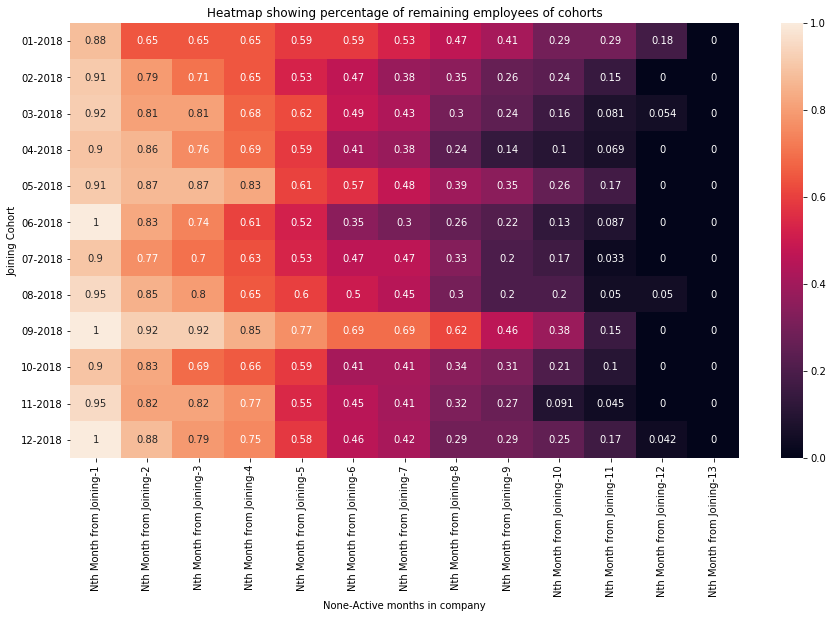

In [84]:
plt.figure(figsize=(15, 8))
plt.title('Heatmap showing percentage of remaining employees of cohorts')
sns.heatmap(percentage_matrix, annot = True)
plt.show()

## Probability of Employee leaving the company with respect to Department

In [85]:
joining_dept_cohort_groups = df.groupby(['Department', 'Joining Cohort'])

In [86]:
Department_wise_joining_cohort = joining_dept_cohort_groups.size().unstack(0)
Department_wise_joining_cohort.fillna(0, inplace = True)

In [87]:
Department_wise_joining_cohort = Department_wise_joining_cohort.astype('int')
Department_wise_joining_cohort

Department,Data Science,Design Team,Marketing,Product Management,Sales,Software Development
Joining Cohort,,,,,,
01-2018,14,1,0,0,1,1
02-2018,23,5,0,3,2,1
03-2018,24,6,0,0,6,1
04-2018,18,5,0,1,2,3
05-2018,15,1,0,3,3,1
06-2018,16,4,0,2,1,0
07-2018,22,6,0,1,1,0
08-2018,16,1,0,0,2,1
09-2018,10,0,1,0,1,1


In [88]:
resigning_dept_cohort_groups = df.groupby(['Department', 'Resigning Cohort'])

In [89]:
Department_wise_resigning_cohort = resigning_dept_cohort_groups.size().unstack(0)
Department_wise_resigning_cohort_in_2018 = Department_wise_resigning_cohort.filter(regex = '2018', axis = 0)
Department_wise_resigning_cohort_in_2018.fillna(0, inplace = True)
Department_wise_resigning_cohort_in_2018 = Department_wise_resigning_cohort_in_2018.astype('int')
Department_wise_resigning_cohort_in_2018

Department,Data Science,Design Team,Marketing,Product Management,Sales,Software Development
Resigning Cohort,,,,,,
02-2018,1,0,0,0,0,0
03-2018,2,0,0,0,0,0
04-2018,7,1,0,1,1,2
05-2018,9,2,0,0,0,0
06-2018,3,0,0,0,0,1
07-2018,4,0,0,1,1,1
08-2018,8,5,0,1,2,1
09-2018,12,4,0,0,1,0
10-2018,17,3,0,0,2,1


In [90]:
Department_wise_joining_in_2018 = Department_wise_joining_cohort.sum(axis = 0)
Department_wise_joining_in_2018 = Department_wise_joining_in_2018.astype('int')
Department_wise_joining_in_2018

Department
Data Science            208
Design Team              41
Marketing                 1
Product Management       10
Sales                    31
Software Development     10
dtype: int64

In [91]:
Department_wise_resigning_in_2018 = Department_wise_resigning_cohort_in_2018.sum(axis = 0)
Department_wise_resigning_in_2018 = Department_wise_resigning_in_2018.astype('int')
Department_wise_resigning_in_2018

Department
Data Science            92
Design Team             20
Marketing                1
Product Management       6
Sales                   11
Software Development     6
dtype: int64

In [92]:
department_wise_probability = Department_wise_resigning_in_2018 / Department_wise_joining_in_2018
department_wise_probability

Department
Data Science            0.442308
Design Team             0.487805
Marketing               1.000000
Product Management      0.600000
Sales                   0.354839
Software Development    0.600000
dtype: float64